In [13]:
#change the path to get the location of data
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


## Load CIFAR-10 Data and Pretrained AlexNet Model


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
#Class labels

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


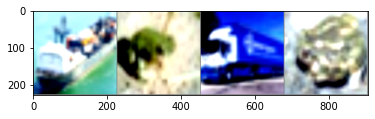

 ship  frog truck  frog


In [5]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cpu


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
#Testing Accuracy
pred_labels=[]
true_labels=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        true_labels.extend(labels.numpy())
        outputs = AlexNet_model(images)
        predicted = torch.max(outputs.data, 1)[1]
        pred_labels.extend(predicted.numpy())

In [35]:
# get the top 10 most frequent predicted labels
from collections import Counter
top_10=Counter(pred_labels).most_common(10)
top10_predLabels=[i[0] for i in top_10]
top10_predLabels

[675, 335, 339, 510, 167, 194, 856, 152, 653, 491]

## Construct the Confusion matrix

The logic here is that CIFAR-10 data as input go through the pretrained AlexNet model and receive predicted labels from 1000 classes (ImageNet). Then construct a confusion matrix: one axis is the group truth label; the other axis is the top 10 most frequent predicted labels.

In [63]:
#calculate the occurance of combination of top10 predicted labels and true labels
d={675:[], 335:[], 339:[], 510:[], 167:[], 194:[], 856:[], 152:[], 653:[], 491:[]}
for predLabel in top10_predLabels:
  for i in range(0,10):
    count=0
    for key, value in enumerate(pred_labels):
      if value==predLabel and true_labels[key]==i:
        count+=1
    d[predLabel].append(count)


In [64]:
import pandas as pd

d=pd.DataFrame(d)
d=d.assign(TrueLabel=classes)
d.set_index("TrueLabel", inplace=True)
#get the ImageNet class text labels for top10_predLabels
cols={675: 'moving van', 335:'fox squirrel, eastern fox squirrel, Sciurus niger', 339:'sorrel', \
      510:'container ship, containership, container vessel', \
      167:'English foxhound', 194: 'Dandie Dinmont, Dandie Dinmont terrier', \
      856:'thresher, thrasher, threshing machine', \
      152:'Japanese spaniel', 653:'milk can', 491:'chain saw, chainsaw'}
d.rename(columns=cols, inplace=True)

In [65]:
d

,moving van,"fox squirrel, eastern fox squirrel, Sciurus niger",sorrel,"container ship, containership, container vessel",English foxhound,"Dandie Dinmont, Dandie Dinmont terrier","thresher, thrasher, threshing machine",Japanese spaniel,milk can,"chain saw, chainsaw"
TrueLabel,,,,,,,,,,
airplane,54,6,2,32,2,1,49,2,10,26
automobile,433,5,0,6,3,2,52,1,34,83
bird,1,134,7,0,12,9,4,10,18,5
cat,8,115,5,0,48,40,0,55,46,4
deer,0,136,87,2,41,20,6,5,13,0
dog,0,30,4,0,97,160,0,125,10,1
frog,0,213,2,0,5,14,1,3,14,1
horse,13,18,288,2,91,10,12,43,18,3
ship,102,6,2,284,1,0,5,1,36,2


In [ ]:
import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(d, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Get output features from fully Connected Layer 6 and 7 of AlexNet

In [8]:
#get the name and layer in the model architecture
names=[]
layers=[]
for name, layer in AlexNet_model.named_modules():
  names.append(name)
  layers.append(layer)

In [9]:
#get the name and layer of fc6
layers[18], names[18]

(Linear(in_features=9216, out_features=4096, bias=True), 'classifier.1')

In [10]:
#get the name and layer of fc7
layers[21], names[21]

(Linear(in_features=4096, out_features=4096, bias=True), 'classifier.4')

In [11]:
# helper function for feature extraction
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

In [12]:
#register the fc6 and fc7 layers to get their outputs

layers[18].register_forward_hook(get_features(names[18]))
layers[21].register_forward_hook(get_features(names[21]))

### Feature extraction from fully connected layer 6 and 7 from test data

In [39]:
##### FEATURE EXTRACTION LOOP

# placeholders
FEATS_fc6 = []
FEATS_fc7=[]

# placeholder for batch features
features = {}

#store the y_test label
y_test=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        y_test.extend(labels.numpy())
        outputs = AlexNet_model(images)
        FEATS_fc6.append(features[names[18]].cpu().numpy())
        FEATS_fc7.append(features[names[21]].cpu().numpy())
        print('.', end='')



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [43]:
FEATS_fc6_con=np.concatenate(FEATS_fc6)
FEATS_fc7_con=np.concatenate(FEATS_fc7)
print('output shape from fully connect layer 6', FEATS_fc6_con.shape)
print('output shape from fully connect layer 7', FEATS_fc7_con.shape)

output shape from fully connect layer 6 (10000, 4096)
output shape from fully connect layer 7 (10000, 4096)


In [48]:
#save the features
np.save('FEATS_fc6_con.npy', FEATS_fc6_con)
np.save('FEATS_fc7_con.npy', FEATS_fc7_con)
np.save('y_test.npy', np.array(y_test))

In [49]:
#load numpy.array
# FEATS_fc6_con=np.load('FEATS_fc6_con.npy')

### Feature extraction from fully connected layer 6 and 7 from test data

In [17]:
##### FEATURE EXTRACTION LOOP

# placeholders
FEATS_fc6_train= []
FEATS_fc7_train=[]

# placeholder for batch features
features= {}

#store the y_test label
y_train=[]
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        y_train.extend(labels.numpy())
        outputs = AlexNet_model(images)
        FEATS_fc6_train.append(features[names[18]].cpu().numpy())
        FEATS_fc7_train.append(features[names[21]].cpu().numpy())
        print('.', end='')



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [18]:
FEATS_fc6_train_con=np.concatenate(FEATS_fc6_train)
FEATS_fc7_train_con=np.concatenate(FEATS_fc7_train)
print('output shape from fully connect layer 6', FEATS_fc6_train_con.shape)
print('output shape from fully connect layer 7', FEATS_fc7_train_con.shape)

output shape from fully connect layer 6 (50000, 4096)
output shape from fully connect layer 7 (50000, 4096)


In [19]:
#save the features
np.save('FEATS_fc6_train_con', FEATS_fc6_train_con)
np.save('FEATS_fc7_train_con.npy', FEATS_fc7_train_con)
np.save('y_train.npy', np.array(y_train))

## Losistic Regression using output of the fc6 layer as features

In [23]:
xtrain=FEATS_fc6_train_con
ytrain=y_train

In [20]:
#load the test data
xtest=np.load('FEATS_fc6_con.npy')
ytest=np.load('y_test.npy')

>0.0 0.836 (0.003)
>0.0001 0.813 (0.004)
>0.001 0.843 (0.003)
>0.01 0.842 (0.002)
>0.1 0.837 (0.003)
>1.0 0.837 (0.003)


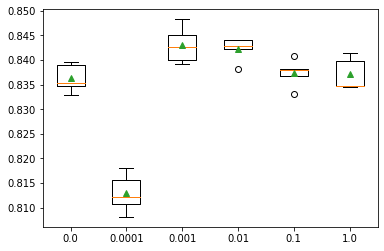

In [28]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key =p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure (train:val=4:1)
	cv = StratifiedKFold(n_splits=5)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, xtrain, ytrain)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [31]:
#train the best model using all training data 
bestModel=models[0.001]
bestModel.fit(xtrain, ytrain)
#predict test data
pred_test=bestModel.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
#test accuracy
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(ytest, pred_test)*100
print("test accuracy:", test_accuracy)

test accuracy: 84.53


Confusion matrix

In [39]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [40]:
import pandas as pd
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, pred_test)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

In [44]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,847,12,27,16,5,1,3,7,51,31
automobile,17,896,1,3,3,1,5,3,10,61
bird,30,1,790,41,57,19,38,16,7,1
cat,11,5,32,710,39,116,46,22,14,5
deer,9,1,34,35,836,11,26,45,3,0
dog,5,2,17,107,29,792,12,30,3,3
frog,3,1,30,26,26,12,893,4,4,1
horse,16,1,28,26,46,25,2,850,2,4
ship,38,17,3,7,1,0,1,2,922,9
truck,16,43,1,3,1,0,0,5,14,917


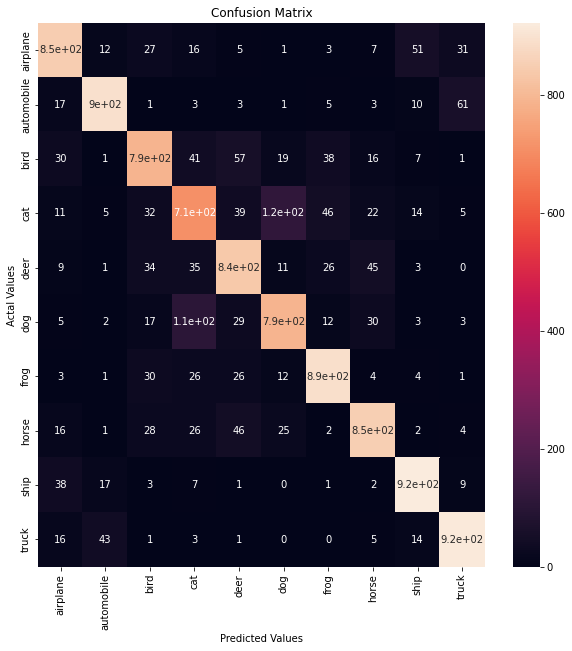

In [43]:
import seaborn as sns
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()